In [70]:
import os
import cv2
from keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization

In [71]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 input_shape=(200,200,3),
                 padding='same'))
model.add(Conv2D(32, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(32, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=(3, 3),
                 padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3),
                 padding='same'))
model.add(LeakyReLU(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())

"""model.add(Dense(512))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.7))
model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.3))
"""
model.add(Dense(512))
model.add(LeakyReLU(0.1))

model.add(Dense(4, activation='softmax'))

The above is the framework of our CNN model, a total of 5 layers, in the last two layers used dropout layer to prevent overfitting, and to a certain extent to achieve the effect of regularization

In [72]:
from tensorflow.keras.optimizers import SGD
model.summary()
adam = Adam(lr=0.0001)
#opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])
model_checkpoint = ModelCheckpoint('./models/best_model.h5', monitor='val_loss',
                                   verbose=1, save_best_only=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 conv2d_21 (Conv2D)          (None, 200, 200, 32)      4640      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 conv2d_22 (Conv2D)          (None, 100, 100, 32)      9248      
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


These are the hyperparameters used to train the CNN with a learning rate of 0.0001, which can make the learning curve smoother without too much fluctuation

In [73]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

In [74]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

 Scaling every images to the same range [0,1] will make images contributes more evenly to the total loss. 

In [75]:
train_dir = '/content/drive/MyDrive/new_data/train'
validation_dir = '/content/drive/MyDrive/new_data/val'
all_classes = [str(i) for i in range(1, 5)]

In [84]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # train_dir = os.path.join(‘./cats_and_dogs_filtered', 'train')
    target_size=(200, 200), 
    batch_size=16,
    classes=all_classes,
    class_mode='categorical',
    shuffle=True)

Found 733 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Load training data and perform one hot encoding

In [85]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(200, 200),
    batch_size=16,
    classes=all_classes,
    class_mode='categorical',
    shuffle=True)

Found 104 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Load validation data and perform one hot encoding

In [86]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=train_generator.samples // 16,
                              epochs=100,
                              verbose=1,
                              callbacks=[model_checkpoint],
                              validation_data=validation_generator,
                              validation_steps=validation_generator.samples // 16,
                              shuffle=True)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


45/45 [==============================] - ETA: 0s - loss: 1.1563 - acc: 0.4770
Epoch 1: val_loss improved from 1.30862 to 1.06504, saving model to ./models/best_model.h5
45/45 [==============================] - 3s 65ms/step - loss: 1.1563 - acc: 0.4770 - val_loss: 1.0650 - val_acc: 0.5729
Epoch 2/100
45/45 [==============================] - ETA: 0s - loss: 0.8333 - acc: 0.6653
Epoch 2: val_loss improved from 1.06504 to 0.80593, saving model to ./models/best_model.h5
45/45 [==============================] - 3s 58ms/step - loss: 0.8333 - acc: 0.6653 - val_loss: 0.8059 - val_acc: 0.6875
Epoch 3/100
45/45 [==============================] - ETA: 0s - loss: 0.6011 - acc: 0.7838
Epoch 3: val_loss improved from 0.80593 to 0.53486, saving model to ./models/best_model.h5
45/45 [==============================] - 3s 59ms/step - loss: 0.6011 - acc: 0.7838 - val_loss: 0.5349 - val_acc: 0.7917
Epoch 4/100
44/45 [============================>.] - ETA: 0s - loss: 0.4660 - acc: 0.8374
Epoch 4: val_loss d

In [87]:
def show_train_history(train_history,train_metrics,validation_metrics):
    plt.plot(train_history.history[train_metrics])
    plt.plot(train_history.history[validation_metrics])
    plt.title('Train History')
    plt.ylabel(train_metrics)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')

def plot(history):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    show_train_history(history,'acc','val_acc')
    plt.subplot(1,2,2)
    show_train_history(history,'loss','val_loss')
    plt.savefig('./models/loss_acc.png')
    plt.show()

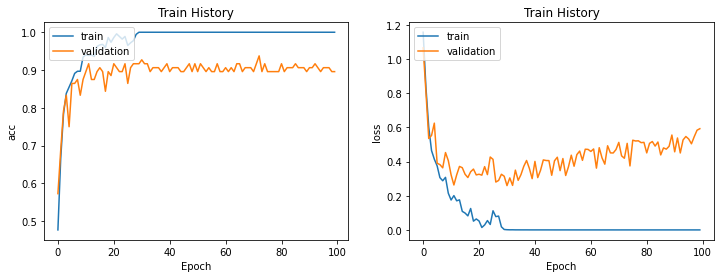

In [88]:
plot(history)

The above is the learning curve of the network. From the learning curve, we can see that the model can converge faster, converging in about 10 epochs, and the validation accuracy is also about 0.9.

In [89]:
def get_files(path):
    file_list = []
    for maindir, subdir, file_name_list in os.walk(path):
        for filename in file_name_list:
            if ".tiff" in filename or ".jpg" in filename:
                apath = os.path.join(maindir,filename)
                file_list.append(apath)
    file_list.sort()
    return file_list

In [90]:
def get_newimage(image, resize_height=200, resize_width=200, normalization=True):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # turn BGR to RGB
    rgb_image = cv2.resize(rgb_image, (resize_width, resize_height))
    rgb_image = np.asanyarray(rgb_image)
    if normalization:
        rgb_image = rgb_image / 255.
    rgb_image = rgb_image[np.newaxis, :]
    return rgb_image

In [91]:
class_list = ["EOS", "LYT", "MON", "NGS"]
labels = list()
preds = list()
predict_list = list()
test_path = '/content/drive/MyDrive/new_data/test'

model = load_model('/content/models/best_model.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 conv2d_21 (Conv2D)          (None, 200, 200, 32)      4640      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 100, 100, 32)      0         
                                                                 
 conv2d_22 (Conv2D)          (None, 100, 100, 32)      9248      
                                                      

Load testing set 

In [92]:
import numpy as np
all_files = get_files(test_path)
for file in all_files:
    print(file)
    label = int(file.split("/")[-2])
    labels.append(label-1)
    image = cv2.imread(file)
    res = model.predict(get_newimage(image))
    res = np.argmax(res)
    preds.append(res)
    if label-1 == res:
        predict_list.append(1)
    else:
        predict_list.append(0)

/content/drive/MyDrive/new_data/test/1/EOS110.tiff
/content/drive/MyDrive/new_data/test/1/EOS111.tiff
/content/drive/MyDrive/new_data/test/1/EOS117.tiff
/content/drive/MyDrive/new_data/test/1/EOS19.tiff
/content/drive/MyDrive/new_data/test/1/EOS2.tiff
/content/drive/MyDrive/new_data/test/1/EOS3.tiff
/content/drive/MyDrive/new_data/test/1/EOS30.tiff
/content/drive/MyDrive/new_data/test/1/EOS32.tiff
/content/drive/MyDrive/new_data/test/1/EOS33.tiff
/content/drive/MyDrive/new_data/test/1/EOS34.tiff
/content/drive/MyDrive/new_data/test/1/EOS38.tiff
/content/drive/MyDrive/new_data/test/1/EOS46.tiff
/content/drive/MyDrive/new_data/test/1/EOS48.tiff
/content/drive/MyDrive/new_data/test/1/EOS5.tiff
/content/drive/MyDrive/new_data/test/1/EOS55.tiff
/content/drive/MyDrive/new_data/test/1/EOS59.tiff
/content/drive/MyDrive/new_data/test/1/EOS6.tiff
/content/drive/MyDrive/new_data/test/1/EOS62.tiff
/content/drive/MyDrive/new_data/test/1/EOS72.tiff
/content/drive/MyDrive/new_data/test/1/EOS79.tiff
/

In [93]:
print("Accuracy：",sum(predict_list)/len(predict_list))

Accuracy： 0.9033816425120773


In [94]:
from sklearn.metrics import confusion_matrix
C = confusion_matrix(labels, preds)
print(C)

[[15  1  2  5]
 [ 0 77  2  1]
 [ 5  2 39  0]
 [ 2  0  0 56]]


In [95]:
import numpy as np
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.show()

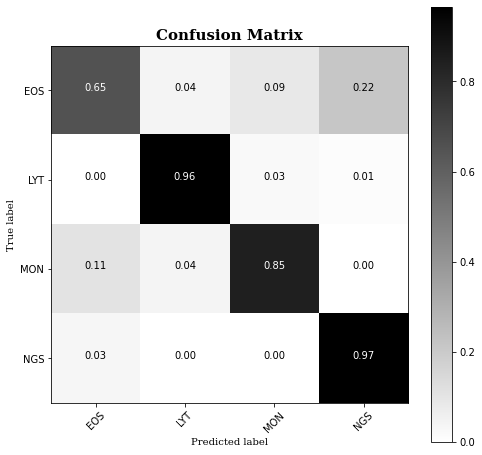

In [96]:
# Compute confusion matrix
import itertools   
cnf_matrix = confusion_matrix(labels, preds)
np.set_printoptions(precision=2)
label_names = ["EOS", "LYT", "MON", "NGS"]
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix')

The following code is used to select an image to feed into the trained model and get its feature maps in different layers

In [51]:
test_path = '/content/drive/MyDrive/new_data/test/3/MON9.tiff'

In [52]:
model.layers

In [53]:
model_1 = load_model('/content/models/best_model.h5')
model_1 = Model(inputs=model.input, outputs=model.layers[1].output)

In [54]:
image = cv2.imread(test_path)
features = model_1.predict(get_newimage(image))
print(features.shape)
feature_maps = np.squeeze(features, axis=0)
num = feature_maps.shape[2]
all_feature_maps = list()

(1, 200, 200, 32)


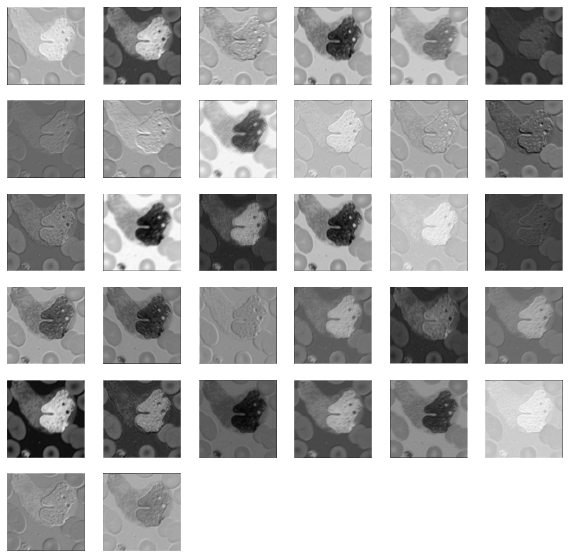

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(num):
    plt.subplot(6,6,i+1)
    all_feature_maps.append(feature_maps[:,:,i])
    plt.imshow(feature_maps[:,:,i],'gray')
    plt.axis('off')




(-0.5, 199.5, 199.5, -0.5)

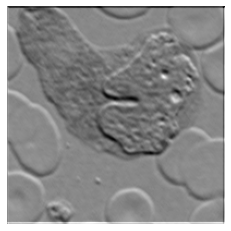

In [ ]:
sum_feature_map_1 = sum(feature_map for feature_map in all_feature_maps)
plt.imshow(sum_feature_map_1,cmap='gray')
plt.axis('off')



In [ ]:
model_2 = load_model('/content/models/best_model.h5')
model_2 = Model(inputs=model.input, outputs=model.layers[6].output)

In [ ]:
image = cv2.imread(test_path)
features = model_2.predict(get_newimage(image))
print(features.shape)
feature_maps = np.squeeze(features, axis=0)
num = feature_maps.shape[2]
all_feature_maps = list()

(1, 100, 100, 64)


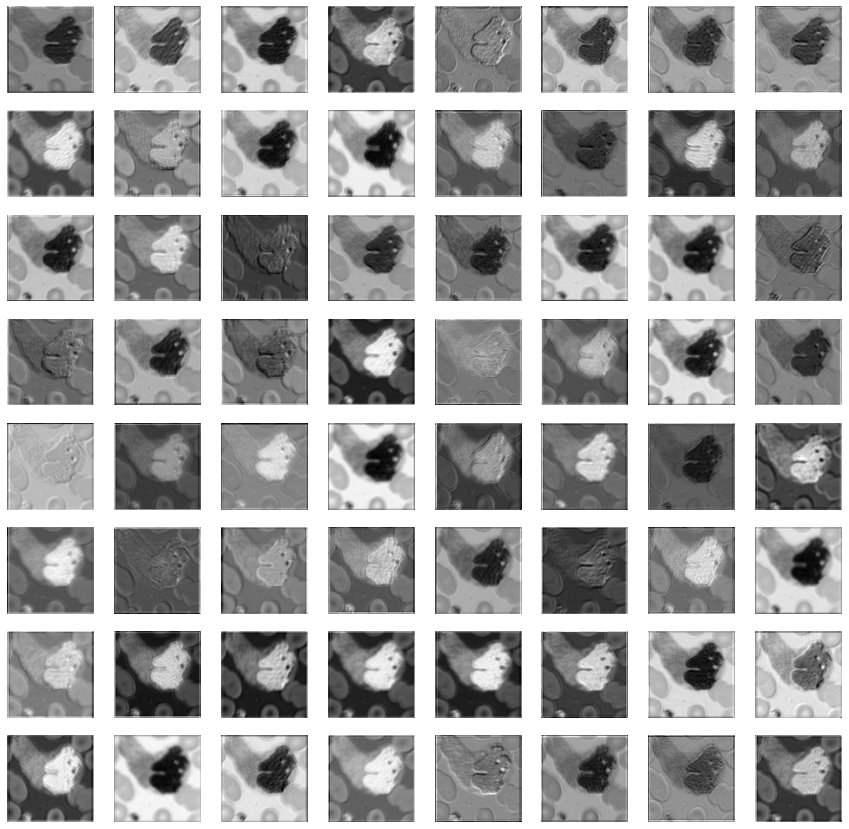

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(num):
    plt.subplot(8,8,i+1)
    all_feature_maps.append(feature_maps[:,:,i])
    plt.imshow(feature_maps[:,:,i],'gray')
    plt.axis('off')


(-0.5, 99.5, 99.5, -0.5)

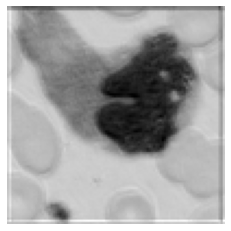

In [ ]:
sum_feature_map_2 = sum(feature_map for feature_map in all_feature_maps)
plt.imshow(sum_feature_map_2,cmap='gray')
plt.axis('off')

In [ ]:
model_3 = load_model('/content/models/best_model.h5')
model_3 = Model(inputs=model.input, outputs=model.layers[10].output)
image = cv2.imread(test_path)
features = model_3.predict(get_newimage(image))
print(features.shape)
feature_maps = np.squeeze(features, axis=0)
num = feature_maps.shape[2]
all_feature_maps = list()

(1, 50, 50, 128)


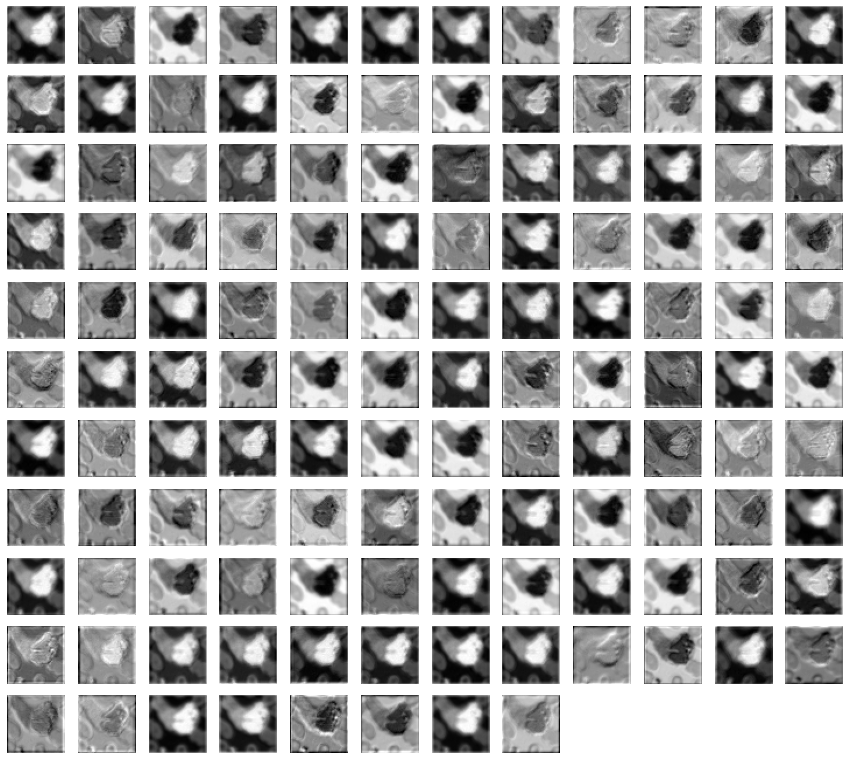

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(num):
    plt.subplot(12,12,i+1)
    all_feature_maps.append(feature_maps[:,:,i])
    plt.imshow(feature_maps[:,:,i],'gray')
    plt.axis('off')


(-0.5, 49.5, 49.5, -0.5)

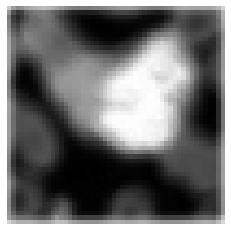

In [ ]:
sum_feature_map_3 = sum(feature_map for feature_map in all_feature_maps)
plt.imshow(sum_feature_map_3,cmap='gray')
plt.axis('off')

In [ ]:
model.layers

In [ ]:
model_4 = load_model('/content/models/best_model.h5')
model_4 = Model(inputs=model.input, outputs=model.layers[14].output)
image = cv2.imread(test_path)
features = model_4.predict(get_newimage(image))
print(features.shape)
feature_maps = np.squeeze(features, axis=0)
num = feature_maps.shape[2]
all_feature_maps = list()

(1, 25, 25, 256)


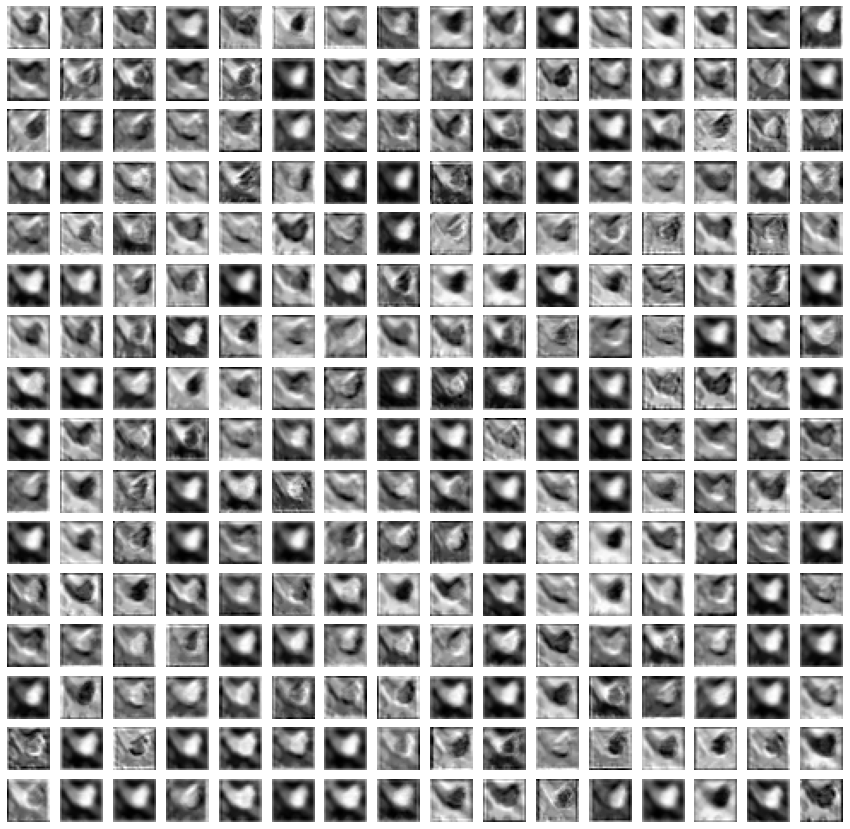

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(num):
    plt.subplot(16,16,i+1)
    all_feature_maps.append(feature_maps[:,:,i])
    plt.imshow(feature_maps[:,:,i],'gray')
    plt.axis('off')

(-0.5, 24.5, 24.5, -0.5)

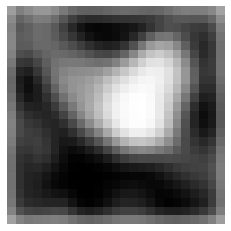

In [ ]:
sum_feature_map_4 = sum(feature_map for feature_map in all_feature_maps)
plt.imshow(sum_feature_map_4,cmap='gray')
plt.axis('off')

In [65]:
model_5 = load_model('/content/models/best_model.h5')
model_5 = Model(inputs=model.input, outputs=model.layers[19].output)
image = cv2.imread(test_path)
features = model_5.predict(get_newimage(image))
print(features.shape)
feature_maps = np.squeeze(features, axis=0)
num = feature_maps.shape[2]
all_feature_maps = list()

(1, 12, 12, 512)


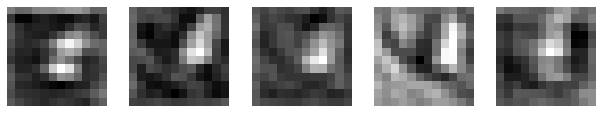

In [68]:
plt.figure(figsize=(50, 50))
for i in range(5):
    plt.subplot(23,23,i+1)
    all_feature_maps.append(feature_maps[:,:,i])
    plt.imshow(feature_maps[:,:,i],'gray')
    plt.axis('off')

(-0.5, 11.5, 11.5, -0.5)

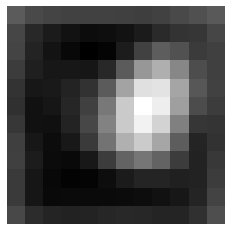

In [ ]:
sum_feature_map_5 = sum(feature_map for feature_map in all_feature_maps)
plt.imshow(sum_feature_map_5,cmap='gray')
plt.axis('off')

From the above figure, we can see that as the neural network level goes deeper, the more abstract features the model learns, knowing that in the end, our human eye can no longer identify it as a cell, but the neural network model is able to identify